In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, confusion_matrix, r2_score, classification_report 
from scipy import stats
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('ff.csv')
print(data.shape)
data.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<AxesSubplot:ylabel='Frequency'>

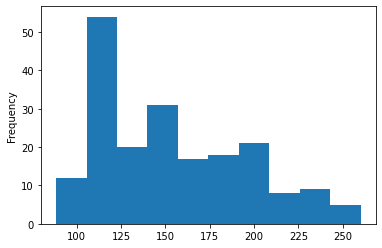

In [6]:
data['MDVP:Fo(Hz)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

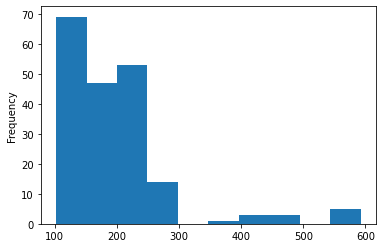

In [7]:
data['MDVP:Fhi(Hz)'].plot.hist()

In [8]:
data.corr().round(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000,0.401,0.597,-0.118,-0.382,-0.076,-0.112,-0.076,-0.098,-0.074,...,-0.095,-0.022,0.059,-0.384,-0.384,-0.446,-0.414,-0.249,0.178,-0.372
MDVP:Fhi(Hz),0.401,1.000,0.085,0.102,-0.029,0.097,0.091,0.097,0.002,0.043,...,-0.004,0.164,-0.025,-0.166,-0.112,-0.343,-0.077,-0.003,0.176,-0.070
MDVP:Flo(Hz),0.597,0.085,1.000,-0.140,-0.278,-0.101,-0.096,-0.100,-0.145,-0.119,...,-0.151,-0.109,0.211,-0.380,-0.400,-0.050,-0.395,-0.244,-0.101,-0.340
MDVP:Jitter(%),-0.118,0.102,-0.140,1.000,0.936,0.990,0.974,0.990,0.769,0.804,...,0.747,0.907,-0.728,0.278,0.361,0.099,0.694,0.385,0.433,0.722
MDVP:Jitter(Abs),-0.382,-0.029,-0.278,0.936,1.000,0.923,0.898,0.923,0.703,0.717,...,0.697,0.835,-0.657,0.339,0.442,0.175,0.736,0.389,0.311,0.748
MDVP:RAP,-0.076,0.097,-0.101,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.722,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:PPQ,-0.112,0.091,-0.096,0.974,0.898,0.957,1.000,0.957,0.798,0.839,...,0.764,0.845,-0.732,0.289,0.333,0.196,0.716,0.408,0.413,0.770
Jitter:DDP,-0.076,0.097,-0.100,0.990,0.923,1.000,0.957,1.000,0.760,0.791,...,0.745,0.920,-0.721,0.267,0.342,0.064,0.648,0.324,0.427,0.671
MDVP:Shimmer,-0.098,0.002,-0.145,0.769,0.703,0.760,0.798,0.760,1.000,0.987,...,0.988,0.722,-0.835,0.367,0.447,0.160,0.655,0.452,0.507,0.694
MDVP:Shimmer(dB),-0.074,0.043,-0.119,0.804,0.717,0.791,0.839,0.791,0.987,1.000,...,0.963,0.744,-0.828,0.351,0.411,0.165,0.653,0.454,0.512,0.695


In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


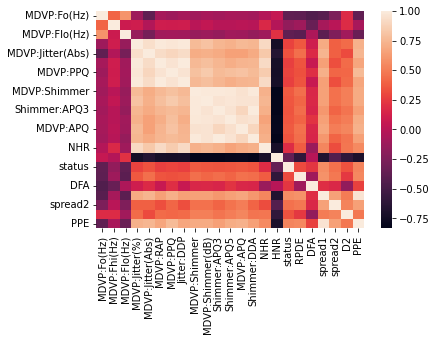

In [10]:
sns.heatmap(data.corr())
plt.show()

In [11]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [12]:
X =data.drop(columns = ['name', 'status'], axis = 1)
Y =data['status']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


# scaling the data to give the same value range: Data Standardization

In [15]:
scaler =StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
print(X_train)

[[-0.80172872 -0.70830513 -0.10603303 ...  0.89854281 -0.48294197
   1.64980971]
 [-1.04374224 -0.74950432 -0.29919921 ...  1.17531845  0.65177741
   0.26864313]
 [-0.3790498   0.13122544 -0.82039362 ... -0.7771489  -0.73102398
   0.28542547]
 ...
 [-0.13744368 -0.31583967  0.56292775 ... -1.65126173 -0.08248373
  -0.17764131]
 [-0.14053505 -0.42034011  0.39263744 ...  0.19569946  1.19665768
  -0.11105606]
 [-0.35427092  4.57536567 -1.22354854 ...  0.55494177  0.80279984
   2.57800238]]


In [19]:
print(X_test)

[[-1.00094234e+00 -7.61129656e-01 -3.33430899e-01 -2.67903948e-01
  -8.37831615e-02 -2.73907813e-01 -1.79605186e-01 -2.72956229e-01
   1.32697546e+00  1.11619250e+00  1.39922326e+00  1.33789355e+00
   1.11666351e+00  1.39955044e+00  2.45567692e-02 -9.70699528e-01
   1.37623734e+00 -3.79194673e-01  1.03265999e-01  9.81854292e-01
   1.08879298e-01  6.45664184e-02]
 [-2.35313090e-01  1.82208595e+00 -8.33907977e-01 -1.29884631e-01
  -8.37831615e-02 -3.58316629e-01 -1.72916619e-01 -3.59448257e-01
  -4.85428396e-01 -4.57177156e-01 -5.78173628e-01 -4.91503147e-01
  -2.07346547e-01 -5.77873985e-01 -1.53075359e-01  7.97915644e-02
   6.78106615e-01 -1.41732622e+00  2.78051185e-01  1.82290931e-01
  -2.86408969e-01  1.60299391e-01]
 [-8.66000457e-01 -7.52544075e-01 -5.31477264e-01  6.75596690e-02
   1.86820838e-01  9.49899789e-02 -1.46162349e-01  9.38533359e-02
   3.87373476e-02 -5.05216135e-02  7.12332498e-02 -1.72732736e-02
  -2.46476419e-02  7.12282085e-02  2.50181514e-02  1.00517984e-01
   1.2

Model Training

Support Vector Machine Model

In [20]:
model = svm.SVC(kernel = 'linear')
auc = make_scorer(roc_auc_score)

In [21]:
#training the svm model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [22]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [23]:
print('training data accuracy score: ',training_data_accuracy )

training data accuracy score:  0.9038461538461539


In [24]:
print(classification_report(Y_train, X_train_prediction))

              precision    recall  f1-score   support

           0       1.00      0.63      0.78        41
           1       0.88      1.00      0.94       115

    accuracy                           0.90       156
   macro avg       0.94      0.82      0.86       156
weighted avg       0.91      0.90      0.90       156



In [25]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [26]:
print('testing data accuracy score: ',testing_data_accuracy )

testing data accuracy score:  0.8717948717948718


In [27]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



In [41]:
pd.DataFrame(confusion_matrix(Y_train, X_train_prediction),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,26,15
Actual Yes,0,115


In [42]:
pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,4,3
Actual Yes,2,30


In [28]:
from sklearn.model_selection import RandomizedSearchCV
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
rand_search = RandomizedSearchCV(model, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, Y_train) 
rand_search.cv_results_


{'mean_fit_time': array([0.0056626 , 0.00632882, 0.00866143, 0.00866183, 0.00433008,
        0.00499646, 0.00499598, 0.00632946, 0.00899585, 0.00433095,
        0.00766238, 0.00632898, 0.00433048, 0.00599615, 0.00532993,
        0.00433064, 0.00632898, 0.00699608, 0.005663  , 0.00499662]),
 'std_fit_time': array([0.00094061, 0.0016996 , 0.00385631, 0.00659559, 0.0012469 ,
        0.00215983, 0.00081576, 0.00124607, 0.00282547, 0.00124615,
        0.00524559, 0.00169985, 0.00047131, 0.00282659, 0.00124647,
        0.00124687, 0.00329847, 0.00081566, 0.00124651, 0.00081624]),
 'mean_score_time': array([0.02898375, 0.00266695, 0.00199938, 0.00299803, 0.00266552,
        0.00466458, 0.00233261, 0.00266576, 0.00366298, 0.00233245,
        0.00366521, 0.00266544, 0.00299883, 0.00233245, 0.00233229,
        0.00299867, 0.00366465, 0.00333126, 0.00299827, 0.00299883]),
 'std_score_time': array([0.01800783, 0.0004712 , 0.        , 0.00081624, 0.0004712 ,
        0.00376849, 0.00047126, 0.000470

In [29]:
rand_search.best_params_

{'C': 6.479197998006022, 'gamma': 0.22054161556730448}

In [30]:
rand_search.best_estimator_

SVC(C=6.479197998006022, gamma=0.22054161556730448, kernel='linear')

In [31]:
final_model = svm.SVC(C=2.209602254061174, gamma=0.8670701646824878, kernel='linear')

In [32]:
final_model.fit(X_train,Y_train)
pred_xgboost_train= final_model.predict(X_train)
print(classification_report(Y_train, pred_xgboost_train))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82        41
           1       0.90      0.99      0.95       115

    accuracy                           0.92       156
   macro avg       0.94      0.85      0.88       156
weighted avg       0.92      0.92      0.91       156



In [33]:
pd.DataFrame(confusion_matrix(Y_train, pred_xgboost_train),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,29,12
Actual Yes,1,114


In [44]:
final_model.fit(X_test,Y_test)
pred_test = final_model.predict(X_test)
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [45]:
pd.DataFrame(confusion_matrix(Y_test, pred_test),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,5,2
Actual Yes,0,32


In [35]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [37]:
grid_predictions_train = grid.predict(X_train)
  
# print classification report
print(classification_report(Y_train, grid_predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       115

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [38]:
grid_predictions_test = grid.predict(X_test)
  
# print classification report
print(classification_report(Y_test, grid_predictions_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [39]:
pd.DataFrame(confusion_matrix(Y_train, grid_predictions_train),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,41,0
Actual Yes,0,115


In [40]:
pd.DataFrame(confusion_matrix(Y_test, grid_predictions_test),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,5,2
Actual Yes,0,32


# Building a Predictive System

In [48]:
input_data = (168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,0.01441,0.01893,0.0343,0.04322,0.02919,20.376,0.631099,0.605417,-2.93107,0.434326,3.007463,0.430788)

#Changing input data to a numpy array
input_data_numpy = np.asarray(input_data)

#Reshaping Array
input_data_reshape = input_data_numpy.reshape(1, -1)

#Standardidize the data
std_data = scaler.transform(input_data_reshape)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person does not have parkinson disease')
    
else:
    print('The person has parkinson disease')


[1]
The person has parkinson disease


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
